# Setting path for the downloaded dataset and basic preprocessing

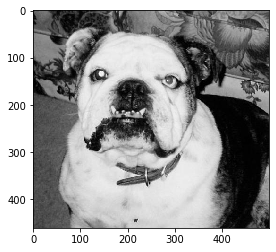

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/home/ankan/Desktop/Jupyter Notebook/kagglecatsanddogs_3367a/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [10]:
print(img_array)

[[ 89  87  91 ... 118 117 115]
 [ 97  94  92 ... 121 119 117]
 [ 94  95  93 ... 122 118 114]
 ...
 [ 77  79  78 ...   5   5   6]
 [ 77  80  80 ...   6   6   7]
 [ 75  79  80 ...   6   7   7]]


In [11]:
print(img_array.shape)
print(img_array.size)

(461, 500)
230500


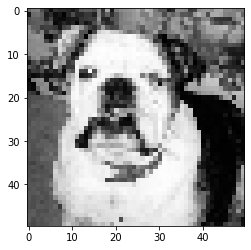

In [14]:
#we are going to change all the images to the same shape
IMG_SIZE = 50
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

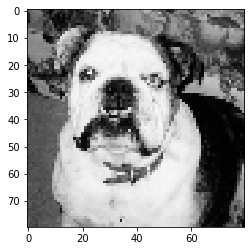

In [18]:
#the prev one is quite blurry, so we will increase the size to 100*100
new_array = cv2.resize(img_array,(80,80))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [29]:
# Better. Let's try that. Next, we're going to want to create training data and all that, but, first, we should set
# aside some images for final testing. I am going to just manually create a directory called Testing and then 
# create 2 directories inside of there, one for Dog and one for Cat. From here, I am just going to move the first 
# 15 images from both Dog and Cat into the training versions. Make sure you move them, not copy. We will use this 
# for our final tests.

# We will now make the training dataset

In [21]:
#we will now create our training dataset
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
                        #so, training_data[0] will refer to the image array and training_data[1] to the output
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

100%|██████████| 12485/12485 [05:14<00:00, 39.68it/s]


In [22]:
print(len(training_data))

24914


In [ ]:
#Next, we want to shuffle the data. Right now our data is just all dogs, then all cats. This will usually wind 
#up causing trouble too, as, initially, the classifier will learn to just predict dogs always. Then it will shift 
#to oh, just predict all cats! Going back and forth like this is no good either.

In [25]:
import random

random.shuffle(training_data)

In [28]:
#Our training_data is a list, meaning it's mutable, so it's now nicely shuffled. We can confirm this by iterating 
#over a few of the initial samples and printing out the class.

for sample in training_data[:10]:
    print(sample[1])


1
1
0
0
0
0
1
1
1
1


# Great, we've got the classes nicely mixed in! Time to make our model!

In [31]:
X = []
y = []

In [32]:
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 54]
   [ 54]
   [ 56]
   ...
   [ 54]
   [ 55]
   [ 53]]

  [[ 56]
   [ 55]
   [ 57]
   ...
   [ 54]
   [ 56]
   [ 55]]

  [[ 57]
   [ 57]
   [ 58]
   ...
   [ 56]
   [ 57]
   [ 58]]

  ...

  [[221]
   [216]
   [184]
   ...
   [148]
   [196]
   [167]]

  [[222]
   [204]
   [186]
   ...
   [182]
   [167]
   [188]]

  [[220]
   [221]
   [194]
   ...
   [170]
   [176]
   [162]]]]


In [33]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=50, validation_split=0.3)


Train on 17439 samples, validate on 7475 samples
Epoch 1/50
17439/17439 [==============================] - 117s 7ms/sample - loss: 0.6455 - acc: 0.6241 - val_loss: 0.5898 - val_acc: 0.6899
Epoch 2/50
17439/17439 [==============================] - 144s 8ms/sample - loss: 0.5642 - acc: 0.7093 - val_loss: 0.5538 - val_acc: 0.7180
Epoch 3/50
17439/17439 [==============================] - 175s 10ms/sample - loss: 0.5289 - acc: 0.7331 - val_loss: 0.5236 - val_acc: 0.7425
Epoch 4/50
17439/17439 [==============================] - 139s 8ms/sample - loss: 0.4929 - acc: 0.7631 - val_loss: 0.5270 - val_acc: 0.7457
Epoch 5/50
17439/17439 [==============================] - 141s 8ms/sample - loss: 0.4686 - acc: 0.7774 - val_loss: 0.5028 - val_acc: 0.7545
Epoch 6/50
17439/17439 [==============================] - 171s 10ms/sample - loss: 0.4519 - acc: 0.7896 - val_loss: 0.4931 - val_acc: 0.7641
Epoch 7/50
17439/17439 [==============================] - 190s 11ms/sample - loss: 0.4309 - acc: 0.8035 - val